<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-146/blob/main/avance_4(Actividad_Semanal_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Actividad | Reducción de datos PCA

### Integrantes

Alumno: **Erick de Jesus Hernández Cerecedo**  
Matricula: **A01066428**

Alumno: **Francisco Javier Hernández Camarillo**  
Matricula: **A00998083**

### Información del Curso

Nombre: **Ciencia y analítica de datos**  
Profesor: **Jobish Vallikavungal Devassia**

Fechas: **Martes 11 de octubre de 2022**

---

### Parte 1: Ejercicio guiado

- **Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos. 
- **Paso 2:** Interprete cada componente principal en términos de las variables originales. 
- **Paso 3:** Identifique valores atípicos. 


**En la parte de inferior del documento se anexan las preguntas con sus respectivas respuestas**

In [ ]:
# Importacion de librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# URL de la ubicación del archivo
mypath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

# Lectura del conjunto de datos en formato CSV
df = pd.read_csv(mypath, sep=",", index_col = 0)
df.index.name = None

# Tamaño de los datos
print(df.shape)

df.head()


(30000, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
# Normalización del conjunto de datos sobre ambos ejes.
df2 = preprocessing.scale(df.dropna(axis=0)) # Centro a la media y componente de la escala sabia a la varianza unitaria.

# Vista de los datos                
print(df2)

# Análisis de componentes principales (PCA).
# Reducción de la dimensionalidad lineal usando la Descomposición de Valor Singular de los datos
print("aqui es el fit")
df3 = PCA().fit(df2)  # Ajuste del modelo con "df2"

# Visualización de df3
print(df3)

[[-1.13736269  0.8096885   0.18584882 ... -0.31412418 -0.29348473
   1.87668918]
 [-0.36656147  0.8096885   0.18584882 ... -0.31412418 -0.18105373
   1.87668918]
 [-0.59780183  0.8096885   0.18584882 ... -0.24870184 -0.01240721
  -0.53285329]
 ...
 [-1.06028257 -1.23504286  0.18584882 ... -0.18327949 -0.11921667
   1.87668918]
 [-0.67488196 -1.23504286  1.45093833 ...  3.15090487 -0.19207196
   1.87668918]
 [-0.90612232 -1.23504286  0.18584882 ... -0.24870184 -0.23726923
   1.87668918]]
aqui es el fit
PCA()


In [ ]:
pcs = PCA()
#pcs.fit(df.dropna(axis=0))

# Ajuste de modelo normalizado df
pcs.fit(preprocessing.scale(df.dropna(axis=0)))

# Obtencion de resumen de varianza reasignada
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

# Inversion de columanas a filas
pcsSummary_df = pcsSummary_df.transpose()

# Renombramiento de columnas
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

# Visualizacion 
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,2.559777,2.049717,1.246196,1.214423,1.020248,0.986956,0.956944,0.952515,0.941475,0.933451,...,0.724292,0.630763,0.509445,0.498871,0.434526,0.363186,0.264844,0.201936,0.159026,0.152384
Proportion of variance,0.273010,0.175050,0.064706,0.061449,0.043370,0.040585,0.038155,0.037802,0.036931,0.036304,...,0.021858,0.016577,0.010814,0.010369,0.007867,0.005496,0.002923,0.001699,0.001054,0.000968
Cumulative proportion,0.273010,0.448060,0.512766,0.574215,0.617585,0.658170,0.696325,0.734127,0.771058,0.807363,...,0.942235,0.958812,0.969625,0.979995,0.987861,0.993357,0.996280,0.997979,0.999032,1.000000


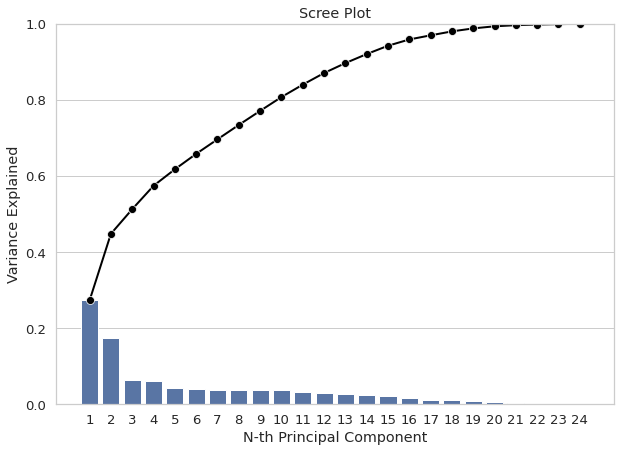

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


In [ ]:
pcs.components_.round(4)

array([[ 6.560e-02, -2.200e-02,  1.980e-02, -5.600e-03,  1.400e-02,
         1.646e-01,  1.973e-01,  2.034e-01,  2.100e-01,  2.137e-01,
         2.089e-01,  3.327e-01,  3.441e-01,  3.480e-01,  3.522e-01,
         3.501e-01,  3.429e-01,  9.260e-02,  7.730e-02,  8.490e-02,
         7.640e-02,  7.400e-02,  6.870e-02,  3.980e-02],
       [ 3.117e-01,  3.050e-02, -8.850e-02, -3.940e-02,  6.280e-02,
        -2.967e-01, -3.280e-01, -3.349e-01, -3.344e-01, -3.212e-01,
        -2.958e-01,  1.436e-01,  1.441e-01,  1.500e-01,  1.492e-01,
         1.473e-01,  1.453e-01,  1.487e-01,  1.387e-01,  1.499e-01,
         1.400e-01,  1.358e-01,  1.281e-01, -1.765e-01],
       [ 1.000e-02,  2.810e-02, -3.177e-01,  4.676e-01, -4.777e-01,
        -2.070e-02,  1.870e-02,  6.380e-02,  9.180e-02,  1.118e-01,
         1.140e-01, -1.459e-01, -1.227e-01, -8.110e-02, -6.800e-02,
        -5.460e-02, -4.590e-02,  2.720e-01,  2.901e-01,  2.687e-01,
         2.274e-01,  1.858e-01,  2.004e-01, -5.610e-02],
       [ 7.66

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
X1,0.065598,0.311654,0.010028,0.076634,-0.198177,-0.267024,-0.261490,0.045703,-0.026711,0.022665,...,-0.753683,-0.019731,0.043483,-0.023420,0.006529,0.006842,-0.009815,0.014381,-0.000612,0.002754
X2,-0.021985,0.030457,0.028071,-0.079480,0.739294,-0.625052,0.007393,0.075174,-0.047962,0.018335,...,0.113839,0.024182,-0.000274,0.021526,-0.003911,-0.001898,0.001902,-0.000739,-0.000765,0.000819
X3,0.019823,-0.088486,-0.317659,0.226782,0.451242,0.391056,0.409058,-0.315610,0.053685,-0.156654,...,-0.374075,-0.024497,0.011579,-0.039122,0.004130,0.002259,-0.002616,0.000461,0.001366,0.001689
X4,-0.005575,-0.039442,0.467603,-0.429091,-0.027033,0.231837,0.189843,-0.120098,0.010383,-0.056852,...,0.134507,0.009526,0.007403,-0.013274,-0.005750,-0.000679,-0.002359,-0.000323,0.000654,-0.001242
X5,0.014004,0.062760,-0.477733,0.447243,-0.139402,0.004678,-0.140081,0.048044,0.007461,0.047643,...,0.434353,0.014455,0.000230,-0.000370,-0.005469,-0.005997,-0.000079,-0.001529,-0.000021,0.000288
X6,0.164630,-0.296726,-0.020711,0.020438,-0.111303,-0.133971,0.218066,-0.024671,-0.035998,-0.032814,...,-0.094790,-0.639387,-0.251697,-0.000185,0.137202,-0.034343,-0.006047,0.000660,-0.002633,0.000587
X7,0.197348,-0.327992,0.018691,0.047993,-0.051945,-0.061264,0.043106,-0.079940,0.004992,-0.034017,...,-0.078995,0.285593,0.557748,-0.059525,-0.485658,0.139909,-0.031289,0.012873,0.003321,0.000037
X8,0.203365,-0.334897,0.063793,0.079836,-0.002505,-0.016452,-0.089191,-0.045382,-0.007855,-0.010996,...,-0.081784,0.529018,-0.098561,-0.156733,0.606257,-0.306535,0.025201,-0.027916,-0.008475,-0.004772
X9,0.210039,-0.334391,0.091784,0.103516,0.037295,0.006186,-0.195906,-0.013898,-0.014555,0.045821,...,-0.060903,0.176909,-0.586799,0.062696,-0.225652,0.567504,0.019212,0.001790,0.014016,-0.001423
X10,0.213734,-0.321173,0.111814,0.109802,0.054857,0.017113,-0.234663,0.042422,0.013752,0.056402,...,-0.023019,-0.167391,-0.081943,0.142817,-0.385960,-0.674094,0.027106,0.023395,-0.008295,-0.000566


In [113]:
#aqui checamos cual variables es de mayor relevancia en cada una de las componentes

for y,x in enumerate(pcsComponents_df.columns):

  mycode ='print (pcsComponents_df.%s.abs().nlargest(3))' %x

  print("3 largest values for %s " %x)

  exec(mycode)

  if y == 15 :

    break



3 largest values for PC1 
X15    0.352168
X16    0.350072
X14    0.348044
Name: PC1, dtype: float64
3 largest values for PC2 
X8    0.334897
X9    0.334391
X7    0.327992
Name: PC2, dtype: float64
3 largest values for PC3 
X5    0.477733
X4    0.467603
X3    0.317659
Name: PC3, dtype: float64
3 largest values for PC4 
X5     0.447243
X4     0.429091
X19    0.322514
Name: PC4, dtype: float64
3 largest values for PC5 
X2    0.739294
X3    0.451242
Y     0.349365
Name: PC5, dtype: float64
3 largest values for PC6 
X2    0.625052
Y     0.417497
X3    0.391056
Name: PC6, dtype: float64
3 largest values for PC7 
Y     0.648333
X3    0.409058
X1    0.261490
Name: PC7, dtype: float64
3 largest values for PC8 
X22    0.699447
X23    0.412761
X3     0.315610
Name: PC8, dtype: float64
3 largest values for PC9 
X21    0.632981
X23    0.500752
X18    0.290064
Name: PC9, dtype: float64
3 largest values for PC10 
X23    0.597032
X22    0.474689
X21    0.445439
Name: PC10, dtype: float64
3 largest val

In [114]:
for y,x in enumerate(pcsComponents_df.columns):

  mycode ='print (pcsComponents_df.%s.abs().nsmallest(3))' %x

  print("3 smallest values for %s " %x)

  exec(mycode)

  if y == 15 :

    break

3 smallest values for PC1 
X4    0.005575
X5    0.014004
X3    0.019823
Name: PC1, dtype: float64
3 smallest values for PC2 
X2    0.030457
X4    0.039442
X5    0.062760
Name: PC2, dtype: float64
3 smallest values for PC3 
X1    0.010028
X7    0.018691
X6    0.020711
Name: PC3, dtype: float64
3 smallest values for PC4 
X6    0.020438
X7    0.047993
Y     0.071885
Name: PC4, dtype: float64
3 smallest values for PC5 
X17    0.000662
X8     0.002505
X13    0.007751
Name: PC5, dtype: float64
3 smallest values for PC6 
X5     0.004678
X16    0.004922
X9     0.006186
Name: PC6, dtype: float64
3 smallest values for PC7 
X2     0.007393
X16    0.025459
X13    0.028354
Name: PC7, dtype: float64
3 smallest values for PC8 
X14    0.003651
X13    0.010220
X9     0.013898
Name: PC8, dtype: float64
3 smallest values for PC9 
X7    0.004992
X5    0.007461
X8    0.007855
Name: PC9, dtype: float64
3 smallest values for PC10 
X11    0.001255
Y      0.005387
X8     0.010996
Name: PC10, dtype: float64
3 s

In [108]:
boxplot1= pcsComponents_df.transpose()
boxplot1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
PC1,0.065598,-0.021985,0.019823,-0.005575,0.014004,0.164630,0.197348,0.203365,0.210039,0.213734,...,0.352168,0.350072,0.342869,0.092628,0.077288,0.084928,0.076421,0.073992,0.068674,0.039821
PC2,0.311654,0.030457,-0.088486,-0.039442,0.062760,-0.296726,-0.327992,-0.334897,-0.334391,-0.321173,...,0.149165,0.147338,0.145287,0.148750,0.138704,0.149934,0.139983,0.135754,0.128126,-0.176545
PC3,0.010028,0.028071,-0.317659,0.467603,-0.477733,-0.020711,0.018691,0.063793,0.091784,0.111814,...,-0.067976,-0.054592,-0.045898,0.272040,0.290144,0.268712,0.227436,0.185761,0.200389,-0.056120
PC4,0.076634,-0.079480,0.226782,-0.429091,0.447243,0.020438,0.047993,0.079836,0.103516,0.109802,...,-0.101888,-0.089315,-0.084064,0.289600,0.322514,0.290349,0.247094,0.185590,0.216658,0.071885
PC5,-0.198177,0.739294,0.451242,-0.027033,-0.139402,-0.111303,-0.051945,-0.002505,0.037295,0.054857,...,0.023493,0.016949,-0.000662,0.118092,0.115253,0.025971,-0.014110,-0.096486,-0.071701,-0.349365
PC6,-0.267024,-0.625052,0.391056,0.231837,0.004678,-0.133971,-0.061264,-0.016452,0.006186,0.017113,...,0.039635,0.004922,-0.031613,0.174176,0.152066,0.064839,-0.087354,-0.210444,-0.132183,-0.417497
PC7,-0.261490,0.007393,0.409058,0.189843,-0.140081,0.218066,0.043106,-0.089191,-0.195906,-0.234663,...,0.028562,0.025459,0.036477,0.054313,0.159969,0.139731,0.098578,0.066863,-0.118929,0.648333
PC8,0.045703,0.075174,-0.315610,-0.120098,0.048044,-0.024671,-0.079940,-0.045382,-0.013898,0.042422,...,0.073750,0.092064,-0.037527,0.212822,0.140783,0.276906,0.069159,-0.699447,-0.412761,0.181843
PC9,-0.026711,-0.047962,0.053685,0.010383,0.007461,-0.035998,0.004992,-0.007855,-0.014555,0.013752,...,-0.046828,0.104682,0.162303,-0.290064,-0.260294,0.186914,0.632981,0.232915,-0.500752,-0.161676
PC10,0.022665,0.018335,-0.156654,-0.056852,0.047643,-0.032814,-0.034017,-0.010996,0.045821,0.056402,...,0.026455,-0.069420,0.080787,0.035358,0.392622,-0.034251,-0.445439,0.474689,-0.597032,-0.005387


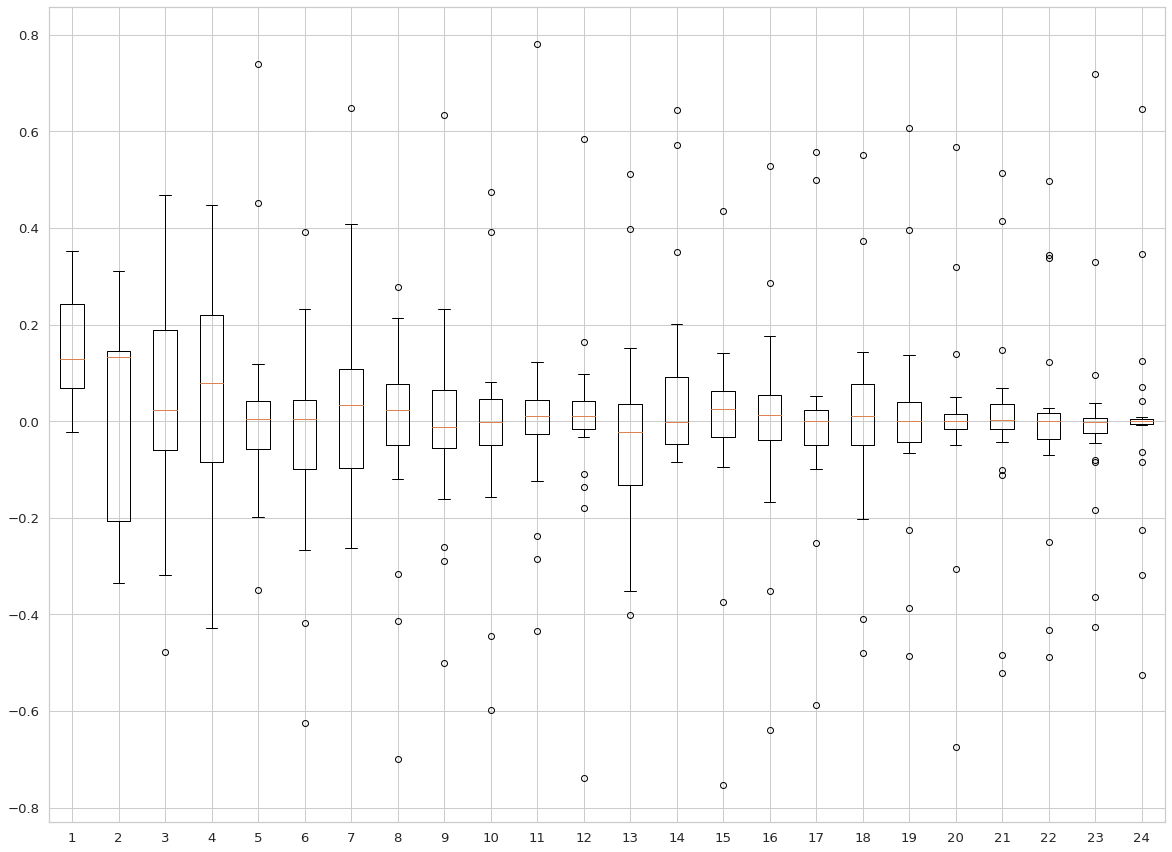

In [109]:
fig = plt.figure(figsize = (20,15))
plt.boxplot(boxplot1,   )
plt.show()

Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

- segun nuestra tabla con 16 componentes tenemos una va

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.


**- segun nuestra tabla con 16 componentes tenemos una varianza acomulada de > 95 % , por lo que consideramos que 16 componentes son suficientes**

Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

**- actividad hecha en dentro del ejercicio ( ver arriba) , se examinaron con valor absoluto caul era la variable de mayor peso para cada componente. esto para cada una de las 16 principales variables**

Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

** - Se sacaron los valores atipicos y se representaron en un boxplot **



Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

* ¿Cuál es el número de componentes mínimo y por qué?
  16 componentes que da una varianza acomulada > 95 % por lo que consideramos y en base al ejercicio de ejemplo es un monto adecuado para evitar perdida de informacion.
* ¿Cuál es la variación de los datos que representan esos componentes?
 95.8 %
* ¿Cuál es la pérdida de información después de realizar PCA?
 4.2 %
* De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
mayor importancia: X15 , Menor importancia : X4 , segun los valores absolutos de la dataframe.

* ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
- cuando hay columnas duplicadas o con la misma relacion de informacion.
- ofrece reduccion de tiempos de procesamiento , reducir la complejidad de los datos e idenficar las caracteristicas mas importantes.